In [7]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [9]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [10]:
# Import citipy
from citipy import citipy

In [11]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

591

In [12]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [13]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [14]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [15]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------") 

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tiksi
Processing Record 2 of Set 1 | cape town
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | nikolskoye
Processing Record 5 of Set 1 | castro
Processing Record 6 of Set 1 | geraldton
Processing Record 7 of Set 1 | itarema
Processing Record 8 of Set 1 | gigmoto
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | saint-philippe
Processing Record 11 of Set 1 | lamar
Processing Record 12 of Set 1 | hobart
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | cherskiy
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | georgetown
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 20 of Set 1 | chuy
Processing Record 21 of Set 1 | terney
Processing Record 22 of Set 1 | hambantota
Processing Record 23 o

In [17]:
len(city_data)

545

In [18]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tiksi,71.6872,128.8694,46.15,67,43,7.94,RU,2021-07-12 22:38:17
1,Cape Town,-33.9258,18.4232,47.88,74,75,4.00,ZA,2021-07-12 22:38:18
2,Vaini,-21.2000,-175.2000,77.16,94,75,6.91,TO,2021-07-12 22:38:18
3,Nikolskoye,59.7035,30.7861,66.09,62,2,2.73,RU,2021-07-12 22:38:18
4,Castro,-24.7911,-50.0119,54.77,71,63,1.54,BR,2021-07-12 22:38:19
5,Geraldton,-28.7667,114.6000,63.01,77,75,23.02,AU,2021-07-12 22:38:19
6,Itarema,-2.9248,-39.9167,79.90,80,88,17.67,BR,2021-07-12 22:38:19
7,Gigmoto,13.7796,124.3900,83.21,82,100,3.69,PH,2021-07-12 22:38:20
8,Puerto Ayora,-0.7393,-90.3518,82.36,76,69,10.42,EC,2021-07-12 22:38:20
9,Saint-Philippe,-21.3585,55.7679,67.55,77,42,14.45,RE,2021-07-12 22:38:20


In [19]:
new_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [28]:
city_data_df = city_data_df[new_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tiksi,RU,2021-07-12 22:38:17,71.6872,128.8694,46.15,67,43,7.94
1,Cape Town,ZA,2021-07-12 22:38:18,-33.9258,18.4232,47.88,74,75,4.00
2,Vaini,TO,2021-07-12 22:38:18,-21.2000,-175.2000,77.16,94,75,6.91
3,Nikolskoye,RU,2021-07-12 22:38:18,59.7035,30.7861,66.09,62,2,2.73
4,Castro,BR,2021-07-12 22:38:19,-24.7911,-50.0119,54.77,71,63,1.54
...,...,...,...,...,...,...,...,...,...
540,Port Hedland,AU,2021-07-12 22:41:07,-20.3167,118.5667,66.25,100,90,0.00
541,Semey,KZ,2021-07-12 22:41:07,50.4111,80.2275,61.02,94,0,4.47
542,Banda Aceh,ID,2021-07-12 22:41:08,5.5577,95.3222,79.36,76,93,12.71
543,Kurilsk,RU,2021-07-12 22:41:08,45.2333,147.8833,61.61,82,78,3.94


In [29]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [30]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

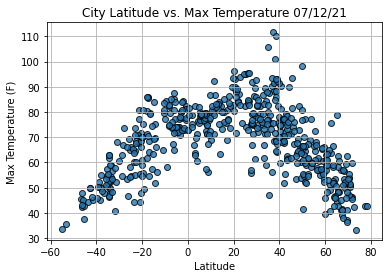

In [31]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

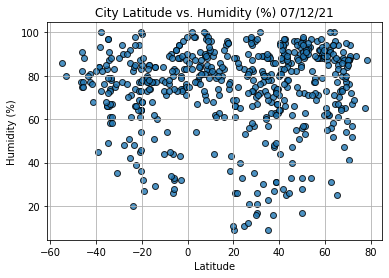

In [36]:
# Import time module
import time

# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity (%) "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

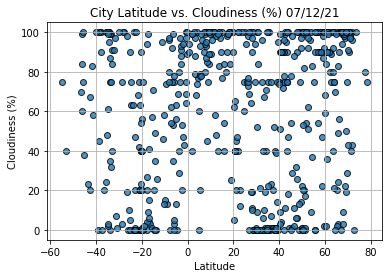

In [37]:
# Import time module
import time

# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

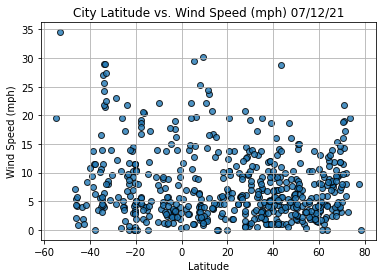

In [38]:
# Import time module
import time

# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed (mph) "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()